# 5.1 Random Forest

## 1. Load Preprocessed Data

In [1]:
from pathlib import Path
import pandas as pd

data_dir = Path("../data/processed")

# Load Random Forest datasets using relative paths
X_train_rf = pd.read_csv(data_dir / "X_train_rf.csv")
X_val_rf = pd.read_csv(data_dir / "X_val_rf.csv")
X_test_rf = pd.read_csv(data_dir / "X_test_rf.csv")

y_train_rf = pd.read_csv(data_dir / "y_train_rf.csv").squeeze() 
y_val_rf = pd.read_csv(data_dir / "y_val_rf.csv").squeeze()
y_test_rf = pd.read_csv(data_dir / "y_test_rf.csv").squeeze()

# Confirm shapes
print("Training set:", X_train_rf.shape, y_train_rf.shape)
print("Validation set:", X_val_rf.shape, y_val_rf.shape)
print("Test set:", X_test_rf.shape, y_test_rf.shape)

Training set: (693942, 35) (693942,)
Validation set: (148702, 35) (148702,)
Test set: (148702, 35) (148702,)


In [2]:
X_train_rf

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,vision_avg,hearing_avg,AST_ALT_ratio,risk_waist,risk_bp,risk_tg,risk_chole,risk_glu,metabolic_risk_count,sex_Male
0,45.0,170.0,70.0,85.5,1.0,1.2,1.0,1.0,108.0,68.0,...,1.10,1.0,2.125000,1.0,0.0,0.0,1.0,0.0,2.0,False
1,55.0,160.0,65.0,79.0,0.8,0.7,1.0,1.0,114.0,68.0,...,0.75,1.0,1.384615,0.0,0.0,0.0,1.0,1.0,2.0,False
2,55.0,155.0,80.0,101.9,0.9,1.0,1.0,1.0,116.0,67.0,...,0.95,1.0,0.736842,1.0,0.0,1.0,0.0,1.0,3.0,False
3,65.0,150.0,55.0,75.0,0.9,0.8,1.0,1.0,136.0,84.0,...,0.85,1.0,1.400000,0.0,1.0,1.0,1.0,0.0,3.0,False
4,40.0,155.0,60.0,85.0,0.9,1.2,1.0,1.0,117.0,69.0,...,1.05,1.0,1.545455,1.0,0.0,0.0,1.0,1.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693937,55.0,155.0,55.0,78.0,0.3,0.5,1.0,1.0,113.0,71.0,...,0.40,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,False
693938,40.0,175.0,90.0,86.0,0.9,1.0,1.0,1.0,105.0,65.0,...,0.95,1.0,1.172414,0.0,0.0,1.0,1.0,1.0,3.0,True
693939,60.0,170.0,75.0,92.0,2.0,1.2,1.0,1.0,126.0,80.0,...,1.60,1.0,0.916667,1.0,0.0,0.0,0.0,1.0,2.0,True
693940,55.0,170.0,85.0,92.0,0.8,0.7,1.0,1.0,130.0,80.0,...,0.75,1.0,0.676471,1.0,1.0,1.0,1.0,1.0,5.0,True


In [3]:
X_train_rf.head(), y_train_rf.head()

(    age  height  weight  waistline  sight_left  sight_right  hear_left  \
 0  45.0   170.0    70.0       85.5         1.0          1.2        1.0   
 1  55.0   160.0    65.0       79.0         0.8          0.7        1.0   
 2  55.0   155.0    80.0      101.9         0.9          1.0        1.0   
 3  65.0   150.0    55.0       75.0         0.9          0.8        1.0   
 4  40.0   155.0    60.0       85.0         0.9          1.2        1.0   
 
    hear_right    SBP   DBP  ...  vision_avg  hearing_avg  AST_ALT_ratio  \
 0         1.0  108.0  68.0  ...        1.10          1.0       2.125000   
 1         1.0  114.0  68.0  ...        0.75          1.0       1.384615   
 2         1.0  116.0  67.0  ...        0.95          1.0       0.736842   
 3         1.0  136.0  84.0  ...        0.85          1.0       1.400000   
 4         1.0  117.0  69.0  ...        1.05          1.0       1.545455   
 
    risk_waist  risk_bp  risk_tg  risk_chole  risk_glu  metabolic_risk_count  \
 0        

In [4]:
y_train_rf

0         0
1         0
2         0
3         0
4         0
         ..
693937    0
693938    1
693939    1
693940    1
693941    0
Name: DRK_YN, Length: 693942, dtype: int64

## 2. Baseline Random Forest Model

Validation Set Performance (Baseline):
AUC:        0.8146
Accuracy:   0.7346
Precision:  0.7333
Recall:     0.7371
F1 Score:   0.7352

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73     74379
           1       0.73      0.74      0.74     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702



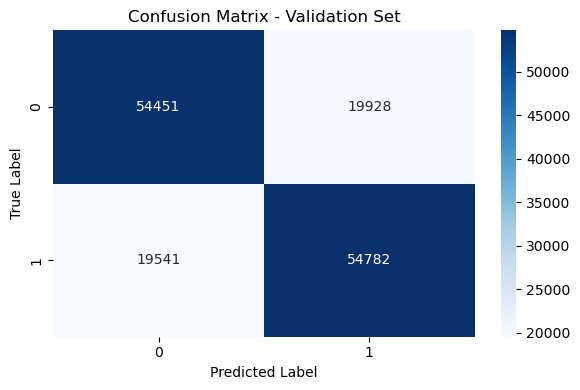

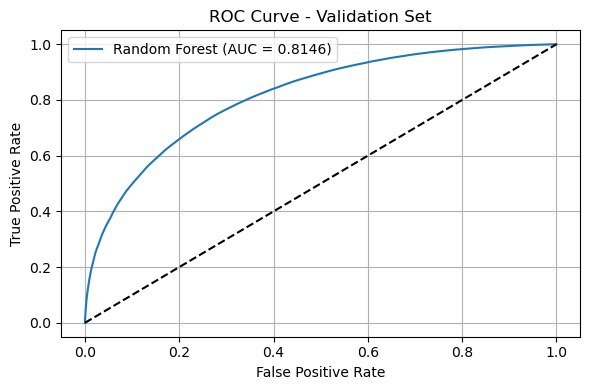

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize baseline model
baseline_model = RandomForestClassifier(
    n_estimators=100,        
    max_depth=None,          
    random_state=42,         
    n_jobs=-1
)

# Train the model
baseline_model.fit(X_train_rf, y_train_rf)

# Predict on validation set
y_val_proba = baseline_model.predict_proba(X_val_rf)[:, 1]
y_val_pred = baseline_model.predict(X_val_rf)

# Evaluation metrics
val_auc = roc_auc_score(y_val_rf, y_val_proba)
val_acc = accuracy_score(y_val_rf, y_val_pred)
val_precision = precision_score(y_val_rf, y_val_pred)
val_recall = recall_score(y_val_rf, y_val_pred)
val_f1 = f1_score(y_val_rf, y_val_pred)
conf_mat = confusion_matrix(y_val_rf, y_val_pred)

# Print results
print("Validation Set Performance (Baseline):")
print(f"AUC:        {val_auc:.4f}")
print(f"Accuracy:   {val_acc:.4f}")
print(f"Precision:  {val_precision:.4f}")
print(f"Recall:     {val_recall:.4f}")
print(f"F1 Score:   {val_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_val_rf, y_val_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val_rf, y_val_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {val_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
y_val_pred_base = y_val_pred
y_val_proba_base = y_val_proba

## 3. Feature Importance Analysis

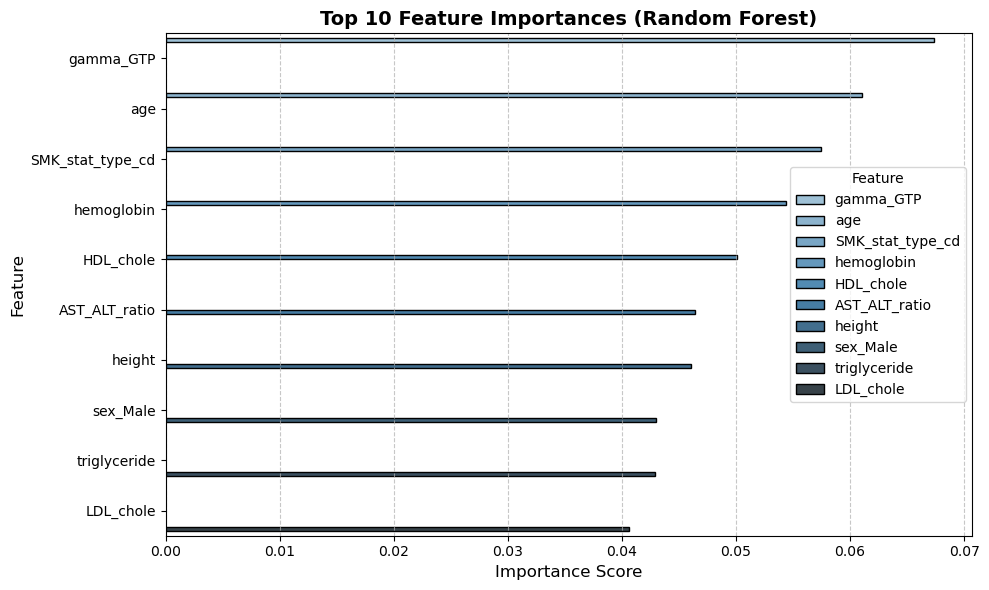

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Get feature importances
importances = baseline_model.feature_importances_
feature_names = X_train_rf.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_n = 10
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    hue='Feature',
    data=top_features,
    palette='Blues_d',
    edgecolor='black',
)

plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Model Performance with Selected Features

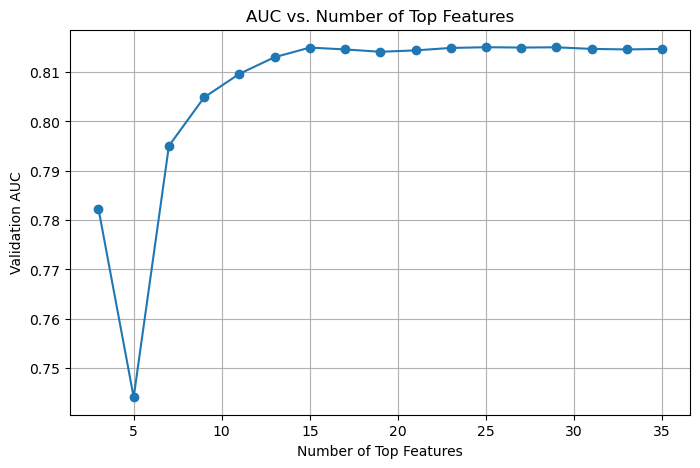

Best number of features: 25, Best AUC: 0.8150


In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

auc_scores = []
feature_range = range(3, len(importance_df)+1, 2) 

for n in feature_range:
    top_features = importance_df.head(n)['Feature'].tolist()
    X_train_sel = X_train_rf[top_features]
    X_val_sel = X_val_rf[top_features]
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_sel, y_train_rf)
    y_val_proba = model.predict_proba(X_val_sel)[:, 1]
    auc = roc_auc_score(y_val_rf, y_val_proba)
    auc_scores.append(auc)

# visualize the AUC vs. Number of Top Features
plt.figure(figsize=(8,5))
plt.plot(feature_range, auc_scores, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Validation AUC')
plt.title('AUC vs. Number of Top Features')
plt.grid(True)
plt.show()

# Find the number of features with the highest AUC
best_n = feature_range[np.argmax(auc_scores)]
print(f"Best number of features: {best_n}, Best AUC: {max(auc_scores):.4f}")

Validation Set:
AUC: 0.8150
Accuracy: 0.7356
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     74379
           1       0.74      0.74      0.74     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702



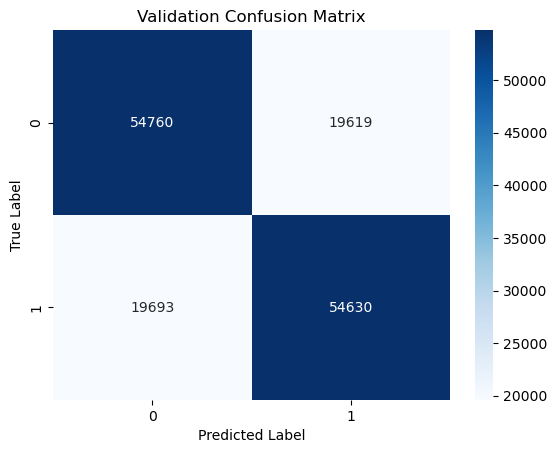

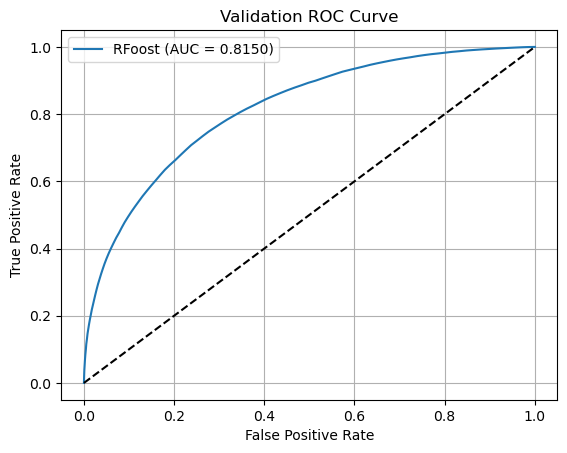

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, accuracy_score, classification_report, 
    confusion_matrix, roc_curve
)
from sklearn.ensemble import RandomForestClassifier

# Select top best_n features
selected_features = importance_df.head(best_n)['Feature'].tolist()
X_train_sel = X_train_rf[selected_features]
X_val_sel = X_val_rf[selected_features]
X_test_sel = X_test_rf[selected_features]

#  Train model
selected_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
selected_model.fit(X_train_sel, y_train_rf)

#  Predictions
y_val_proba = selected_model.predict_proba(X_val_sel)[:, 1]
y_val_pred = selected_model.predict(X_val_sel)
y_test_proba = selected_model.predict_proba(X_test_sel)[:, 1]
y_test_pred = selected_model.predict(X_test_sel)

#  Evaluation scores
print("Validation Set:")
print(f"AUC: {roc_auc_score(y_val_rf, y_val_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_val_rf, y_val_pred):.4f}")
print("Classification Report:\n", classification_report(y_val_rf, y_val_pred))

# Confusion Matrix - Validation
cm_val = confusion_matrix(y_val_rf, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve - Validation
fpr, tpr, _ = roc_curve(y_val_rf, y_val_proba)
plt.plot(fpr, tpr, label='RFoost (AUC = %.4f)' % roc_auc_score(y_val_rf, y_val_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Validation ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
y_val_pred_fs = y_val_pred
y_val_proba_fs = y_val_proba

## 5. Hyperparameter Tuning with Optuna

In [11]:
!pip install optuna


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [13]:
import optuna
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

os.makedirs('results', exist_ok=True)

results_list = []

def objective(trial):
    # Define hyperparameter-search for Random Forest
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),        
        'max_depth': trial.suggest_categorical('max_depth', [None, 10]),        
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42,
        'n_jobs': -1
    }

    # 3-fold cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs, f1s, accs = [], [], []

    for train_idx, val_idx in skf.split(X_train_rf, y_train_rf):
        X_tr, X_val = X_train_rf.iloc[train_idx], X_train_rf.iloc[val_idx]
        y_tr, y_val = y_train_rf.iloc[train_idx], y_train_rf.iloc[val_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        aucs.append(roc_auc_score(y_val, y_proba))
        f1s.append(f1_score(y_val, y_pred))
        accs.append(accuracy_score(y_val, y_pred))

    # Log results
    trial_result = {
        **params,
        'mean_auc': np.mean(aucs),
        'std_auc': np.std(aucs),
        'mean_f1': np.mean(f1s),
        'std_f1': np.std(f1s),
        'mean_acc': np.mean(accs),
        'std_acc': np.std(accs)
    }
    results_list.append(trial_result)

    return np.mean(aucs), np.std(aucs), np.mean(f1s), np.std(f1s), np.mean(accs), np.std(accs)

# Start Optuna-study
study = optuna.create_study(
    directions=['maximize', 'minimize', 'maximize', 'minimize', 'maximize', 'minimize']
)
study.optimize(objective, n_trials=30)

results_df = pd.DataFrame(results_list)
results_df.to_csv('../results/rf_multiobjective_trials.csv', index=False)

# Select best parameters by mean AUC
best_idx = results_df['mean_auc'].idxmax()
best_params = results_df.loc[best_idx]
print("Best parameters (by mean_auc):")
print(best_params)



[I 2025-05-16 21:20:38,729] A new study created in memory with name: no-name-4e2ad97a-25da-4d04-b5cb-424763d71a7f


[I 2025-05-16 21:22:05,693] Trial 0 finished with values: [0.8087610590445818, 0.0011415088573995694, 0.7303025529905666, 0.0015475702180014867, 0.7263849140129867, 0.0012495709267877793] and parameters: {'n_estimators': 174, 'max_depth': 10, 'max_features': 'log2'}.
[I 2025-05-16 21:25:13,601] Trial 1 finished with values: [0.8146297827210391, 0.0010345050397449372, 0.7338666337764169, 0.0012982738919202633, 0.7337126157517487, 0.0011127555343118656] and parameters: {'n_estimators': 132, 'max_depth': None, 'max_features': 'log2'}.
[I 2025-05-16 21:26:23,099] Trial 2 finished with values: [0.8086727852445069, 0.0011738130809927185, 0.7302393093249767, 0.0016934470878616386, 0.7262480149637867, 0.001431307197783548] and parameters: {'n_estimators': 141, 'max_depth': 10, 'max_features': 'log2'}.
[I 2025-05-16 21:27:57,133] Trial 3 finished with values: [0.8090234886952355, 0.0011164629453428, 0.7307190875636195, 0.0015411583889902189, 0.7266976202622121, 0.0012530725315341709] and parame

Best parameters (by mean_auc):
n_estimators              200
max_depth                 NaN
min_samples_split           2
min_samples_leaf            1
max_features             log2
random_state               42
n_jobs                     -1
mean_auc             0.815893
std_auc              0.001078
mean_f1              0.735432
std_f1                0.00154
mean_acc             0.734711
std_acc              0.001342
Name: 8, dtype: object


In [16]:
results_df

,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,random_state,n_jobs,mean_auc,std_auc,mean_f1,std_f1,mean_acc,std_acc
0,174,10.0,2,1,log2,42,-1,0.808761,0.001142,0.730303,0.001548,0.726385,0.001250
1,132,NaN,2,1,log2,42,-1,0.814630,0.001035,0.733867,0.001298,0.733713,0.001113
2,141,10.0,2,1,log2,42,-1,0.808673,0.001174,0.730239,0.001693,0.726248,0.001431
3,198,10.0,2,1,sqrt,42,-1,0.809023,0.001116,0.730719,0.001541,0.726698,0.001253
4,145,10.0,2,1,sqrt,42,-1,0.808668,0.001170,0.730188,0.001661,0.726202,0.001388
5,122,10.0,2,1,log2,42,-1,0.808594,0.001174,0.730208,0.001595,0.726277,0.001378
6,131,10.0,2,1,log2,42,-1,0.808578,0.001168,0.729977,0.001613,0.726097,0.001400
7,147,10.0,2,1,sqrt,42,-1,0.808662,0.001162,0.730172,0.001596,0.726238,0.001332
8,200,NaN,2,1,log2,42,-1,0.815893,0.001078,0.735432,0.001540,0.734711,0.001342
9,108,NaN,2,1,log2,42,-1,0.813823,0.001094,0.732677,0.001206,0.732848,0.000947


## 6. Final Model Training with Best Parameters

Validation Set Performance (Tuned):
AUC: 0.8170
Accuracy: 0.7359
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73     74379
           1       0.73      0.74      0.74     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702



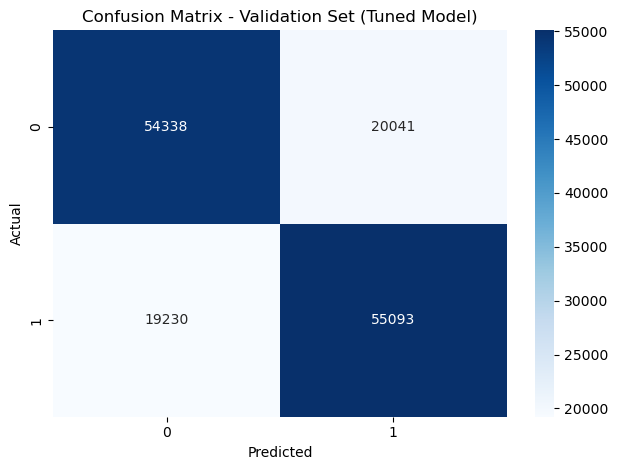

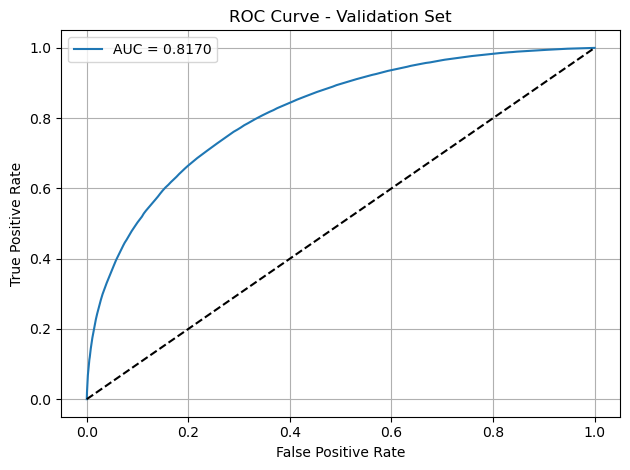

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, 
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

pareto_trials = study.best_trials

best_trial = max(pareto_trials, key=lambda t: t.values[0]) 

best_params = best_trial.params
best_params.update({
    'random_state': 42,
    'n_jobs': -1
})

# Retrain on training set
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_rf, y_train_rf)

# Predict on validation and test sets
y_val_proba = final_model.predict_proba(X_val_rf)[:, 1]
y_val_pred = final_model.predict(X_val_rf)

y_test_proba = final_model.predict_proba(X_test_rf)[:, 1]
y_test_pred = final_model.predict(X_test_rf)

# Evaluation (Validation Set)
print("Validation Set Performance (Tuned):")
print(f"AUC: {roc_auc_score(y_val_rf, y_val_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_val_rf, y_val_pred):.4f}")
print("Classification Report:\n", classification_report(y_val_rf, y_val_pred))

# Confusion Matrix - Validation
cm_val = confusion_matrix(y_val_rf, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Validation Set (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve - Validation
fpr, tpr, _ = roc_curve(y_val_rf, y_val_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val_rf, y_val_proba):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Validation Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
y_val_pred_tuned = y_val_pred
y_val_proba_tuned = y_val_proba
y_test_pred_tuned = y_test_pred
y_test_proba_tuned = y_test_proba

## 7. Model Evaluation and Visualization

In [19]:
import pandas as pd
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
)

# Create a comparison DataFrame for key metrics
comparison_df = pd.DataFrame({
    'Metric': ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Baseline (Val)': [
        roc_auc_score(y_val_rf, y_val_proba_base),
        accuracy_score(y_val_rf, y_val_pred_base),
        precision_score(y_val_rf, y_val_pred_base),
        recall_score(y_val_rf, y_val_pred_base),
        f1_score(y_val_rf, y_val_pred_base)
    ],
    'Feature-Selected (Val)': [
        roc_auc_score(y_val_rf, y_val_proba_fs),
        accuracy_score(y_val_rf, y_val_pred_fs),
        precision_score(y_val_rf, y_val_pred_fs),
        recall_score(y_val_rf, y_val_pred_fs),
        f1_score(y_val_rf, y_val_pred_fs)
    ],
    'Tuned (Val)': [
        roc_auc_score(y_val_rf, y_val_proba_tuned),
        accuracy_score(y_val_rf, y_val_pred_tuned),
        precision_score(y_val_rf, y_val_pred_tuned),
        recall_score(y_val_rf, y_val_pred_tuned),
        f1_score(y_val_rf, y_val_pred_tuned)
    ],
    'Tuned (Test)': [
        roc_auc_score(y_test_rf, y_test_proba),
        accuracy_score(y_test_rf, y_test_pred),
        precision_score(y_test_rf, y_test_pred),
        recall_score(y_test_rf, y_test_pred),
        f1_score(y_test_rf, y_test_pred)
    ]
})

# Round results for better readability
comparison_df.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)

print(comparison_df)

      Metric  Baseline (Val)  Feature-Selected (Val)  Tuned (Val)  \
0        AUC          0.8146                  0.8150       0.8170   
1   Accuracy          0.7346                  0.7356       0.7359   
2  Precision          0.7333                  0.7358       0.7333   
3     Recall          0.7371                  0.7350       0.7413   
4   F1 Score          0.7352                  0.7354       0.7372   

   Tuned (Test)  
0        0.8182  
1        0.7366  
2        0.7350  
3        0.7399  
4        0.7374  


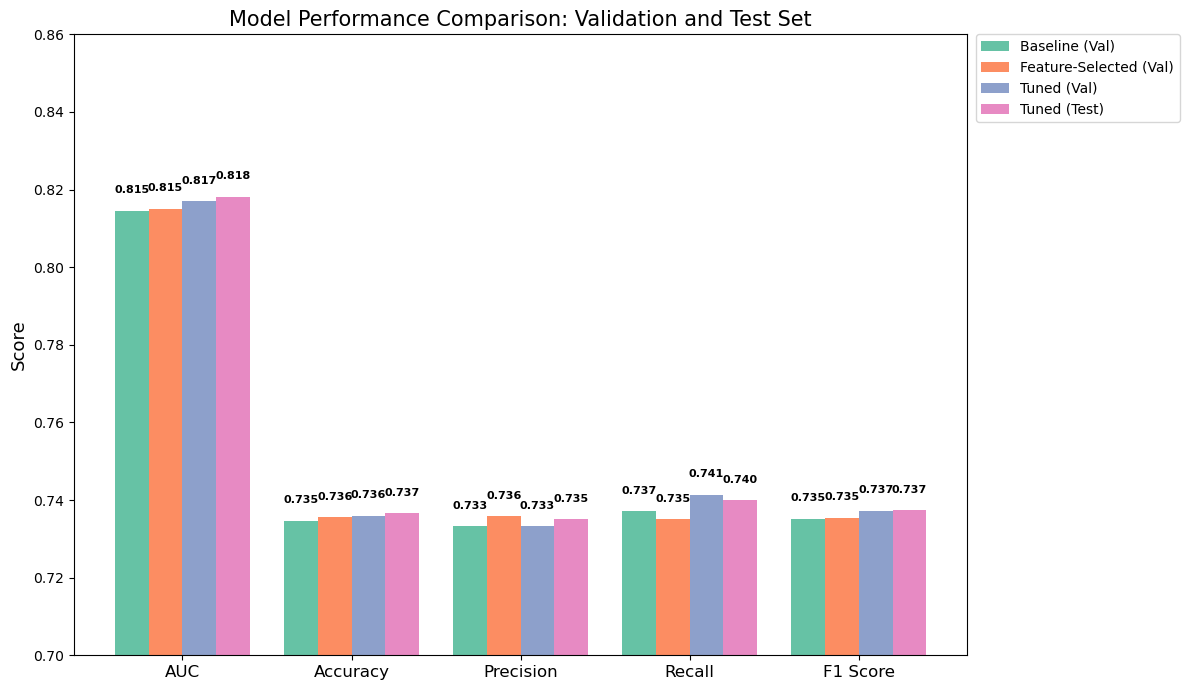

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", 4)

plt.figure(figsize=(12, 7))
metrics = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
x = range(len(metrics))
bar_width = 0.2

bars1 = plt.bar(x, comparison_df['Baseline (Val)'], width=bar_width, label='Baseline (Val)', align='center', color=palette[0])
bars2 = plt.bar([i + bar_width for i in x], comparison_df['Feature-Selected (Val)'], width=bar_width, label='Feature-Selected (Val)', align='center', color=palette[1])
bars3 = plt.bar([i + 2*bar_width for i in x], comparison_df['Tuned (Val)'], width=bar_width, label='Tuned (Val)', align='center', color=palette[2])
bars4 = plt.bar([i + 3*bar_width for i in x], comparison_df['Tuned (Test)'], width=bar_width, label='Tuned (Test)', align='center', color=palette[3])

plt.xticks([i + 1.5*bar_width for i in x], metrics, fontsize=12)
plt.ylabel('Score', fontsize=13)
plt.title('Model Performance Comparison: Validation and Test Set', fontsize=15)
plt.ylim(0.7, 0.86) 
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0., fontsize=10)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, height + 0.004,
            f'{height:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold'
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

plt.tight_layout()
plt.show()